# Lab 6: Entropia w obrazach

In [1]:
import requests
import numpy as np
import os
from PIL import Image, ImageOps
from collections import Counter
from math import log2, ceil
import matplotlib.pyplot as plt

%matplotlib inline

## Wczytywanie zdjęć

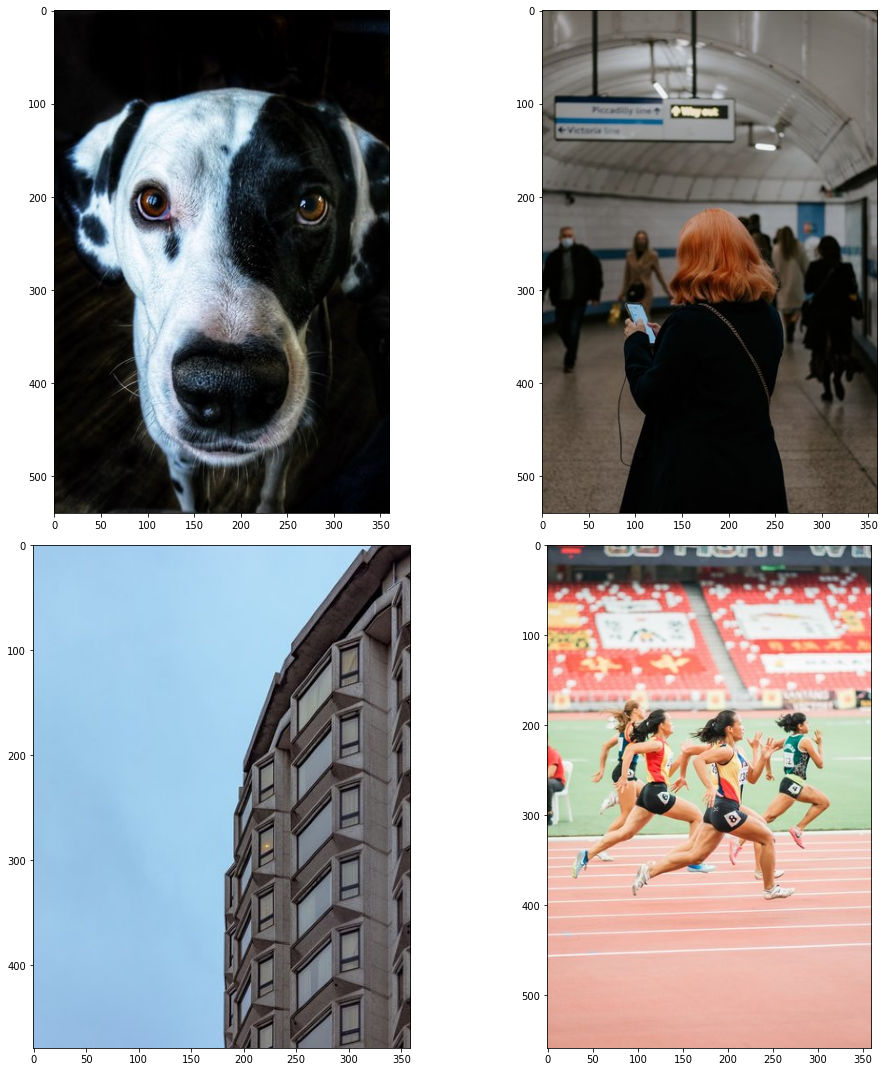

In [20]:
im_dir = "photos"
files = os.listdir(im_dir)

images = []

cols= 2
rows = ceil(len(files) / cols)
plt.figure(figsize=(15,15))

for i, file in enumerate(files, 1):
    im = Image.open(f'{im_dir}/{file}')
    images.append(im)
    plt.subplot(rows, cols, i)
    plt.imshow(np.array(im))

plt.tight_layout() 

## Liczenie entropii

In [4]:
def entropy(pixels):
    probs = [count / len(pixels) for count in Counter(pixels).values()]
    e = -sum([p * log2(p) for p in probs])
    return e


def img_entropy(im_grey, kernel_size):
    if kernel_size % 2 == 0:
        raise Exception('invalid kernel size')
    
    k = int((kernel_size - 1) / 2)
    im_entropy = np.empty(im_grey.shape)
    
    for row in range(im_grey.shape[0]):
        for col in range(im_grey.shape[1]):
            # Lewy górny róg sąsiedztwa
            x0 = max(row - k, 0)
            y0 = max(col - k, 0)
            
            # Prawny dolny róg sąsiedztwa
            x1 = min(row + k, im_grey.shape[0])
            y1 = min(col + k, im_grey.shape[1])
            
            neigh = im_grey[x0:x1, y0:y1]
            im_entropy[row, col] = entropy(neigh.flatten())
    return im_entropy

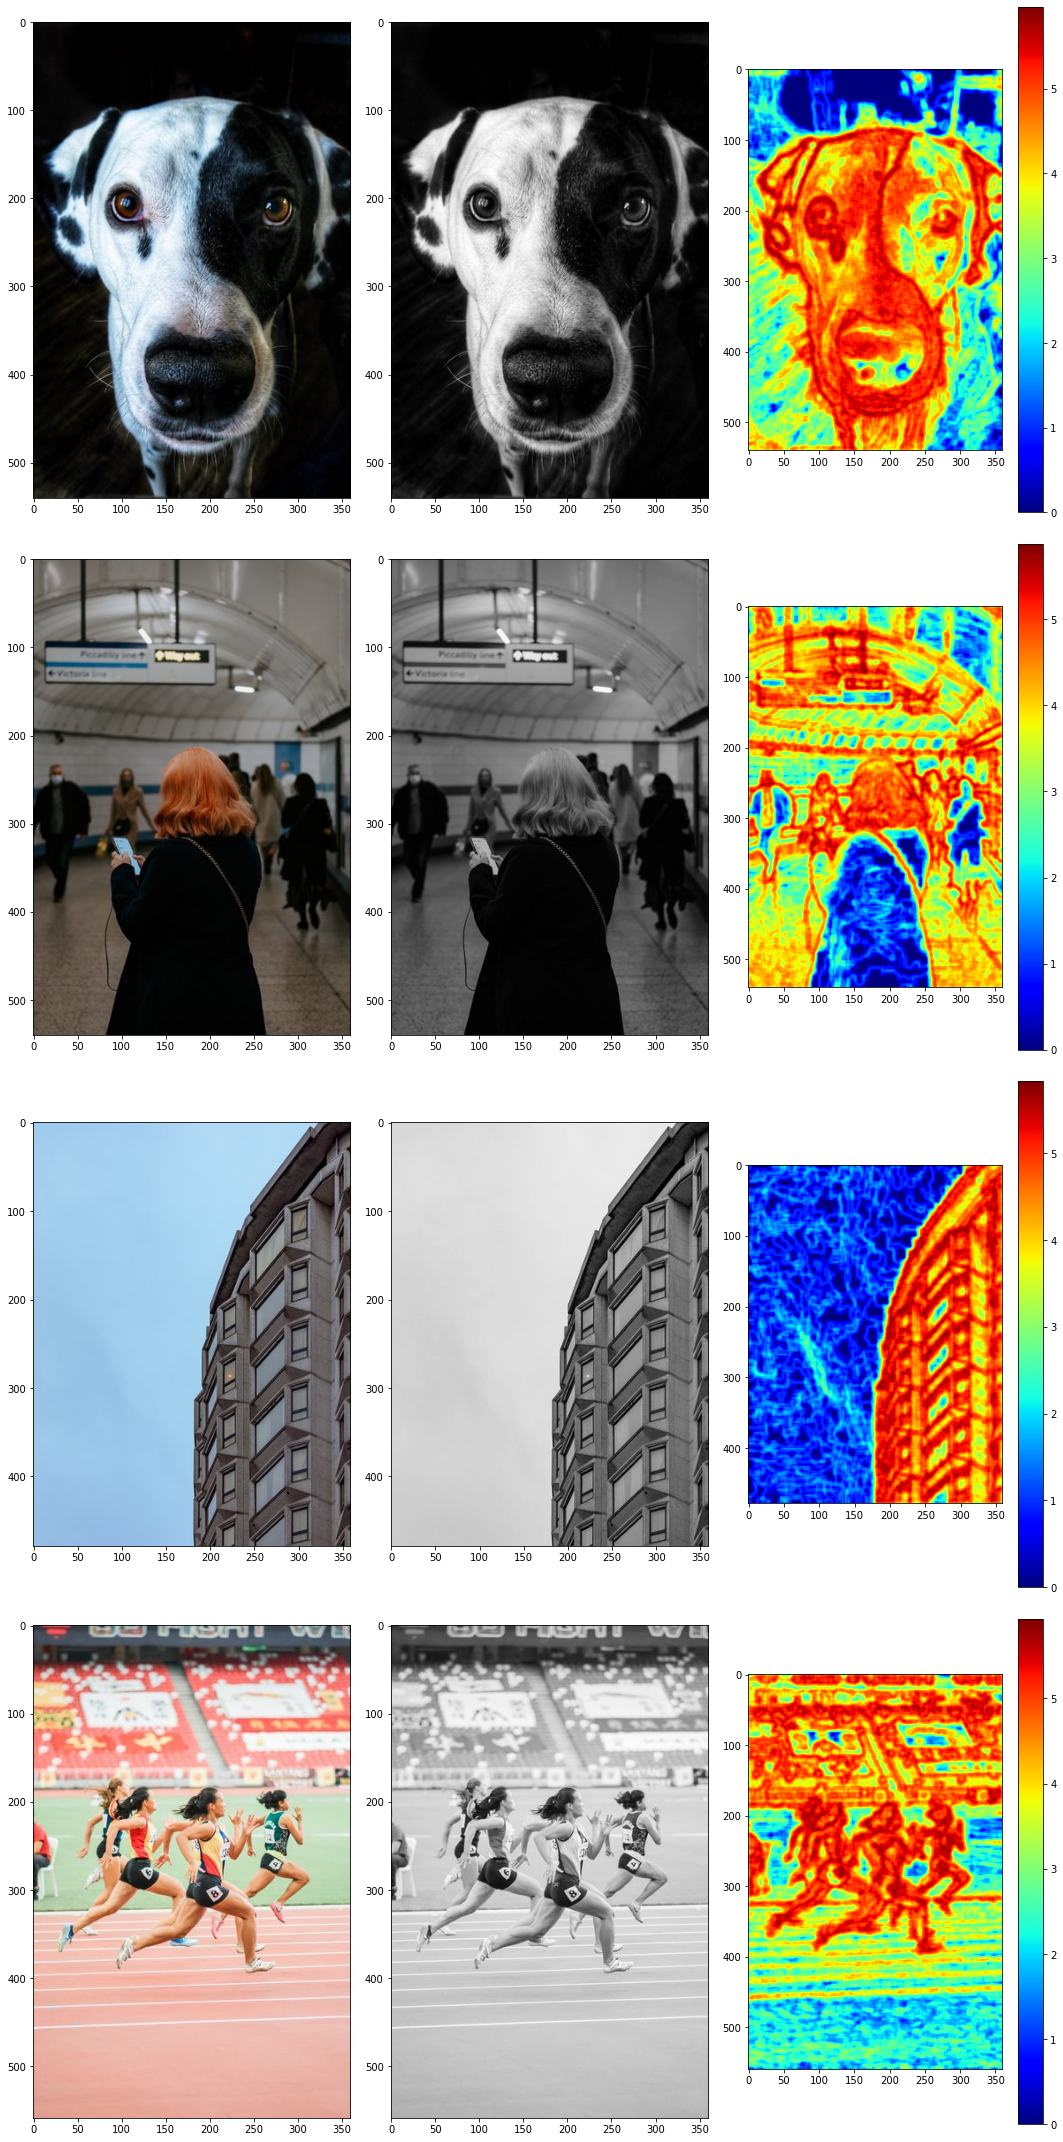

In [5]:
KERNEL_SIZE = 9

cols = 3
rows = ceil((len(images) * 3) / cols)
plt.figure(figsize=(15, 30))

for i, im in enumerate(images):
    # Konwersja do skali szarości
    im_grey = np.array(ImageOps.grayscale(im))
    
    # Obliczanie entropii
    e = img_entropy(im_grey, KERNEL_SIZE)
    
    plt.subplot(rows,cols, 3*i+1)
    plt.imshow(np.array(im), cmap=plt.cm.jet)
    
    plt.subplot(rows,cols, 3*i+2)
    plt.imshow(im_grey, cmap=plt.cm.gray)
    
    plt.subplot(rows,cols, 3*i+3)
    plt.imshow(e, cmap=plt.cm.jet)
    plt.colorbar()

plt.tight_layout() 

## Wpływ rozmiaru przedział na entropię

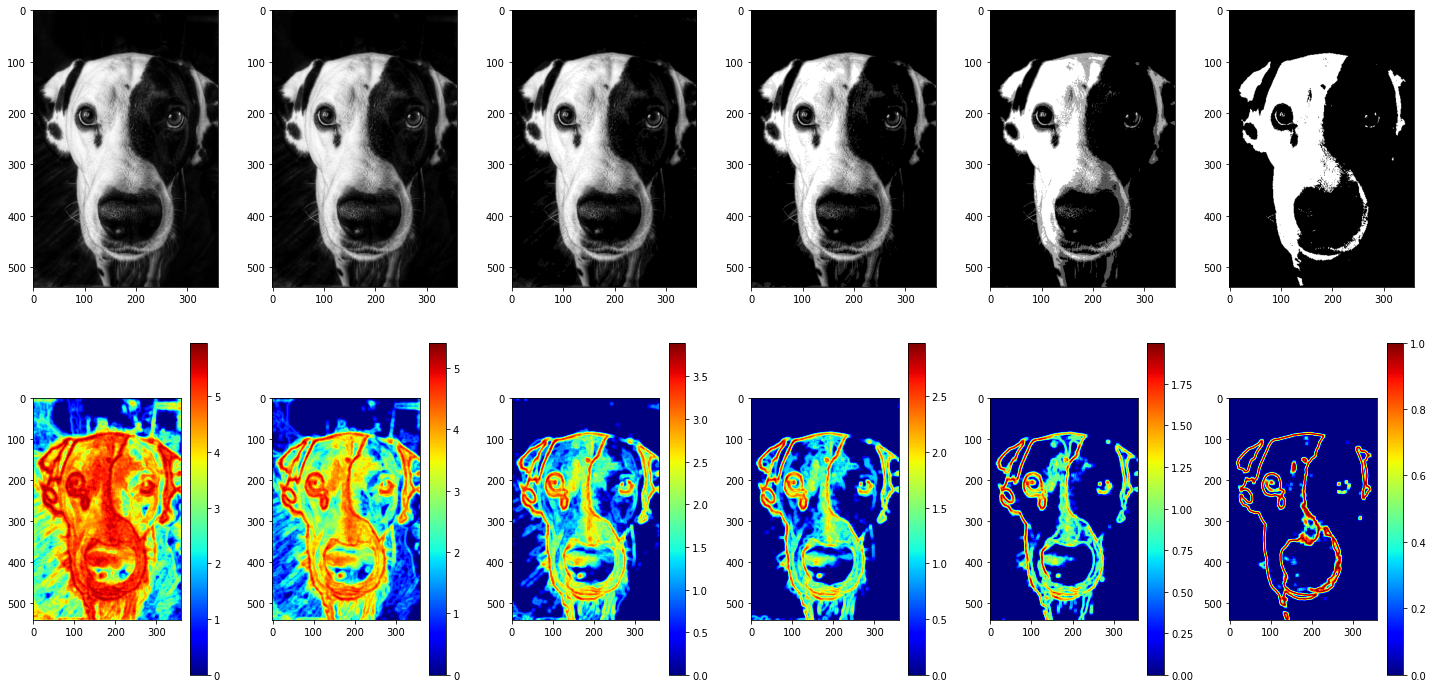

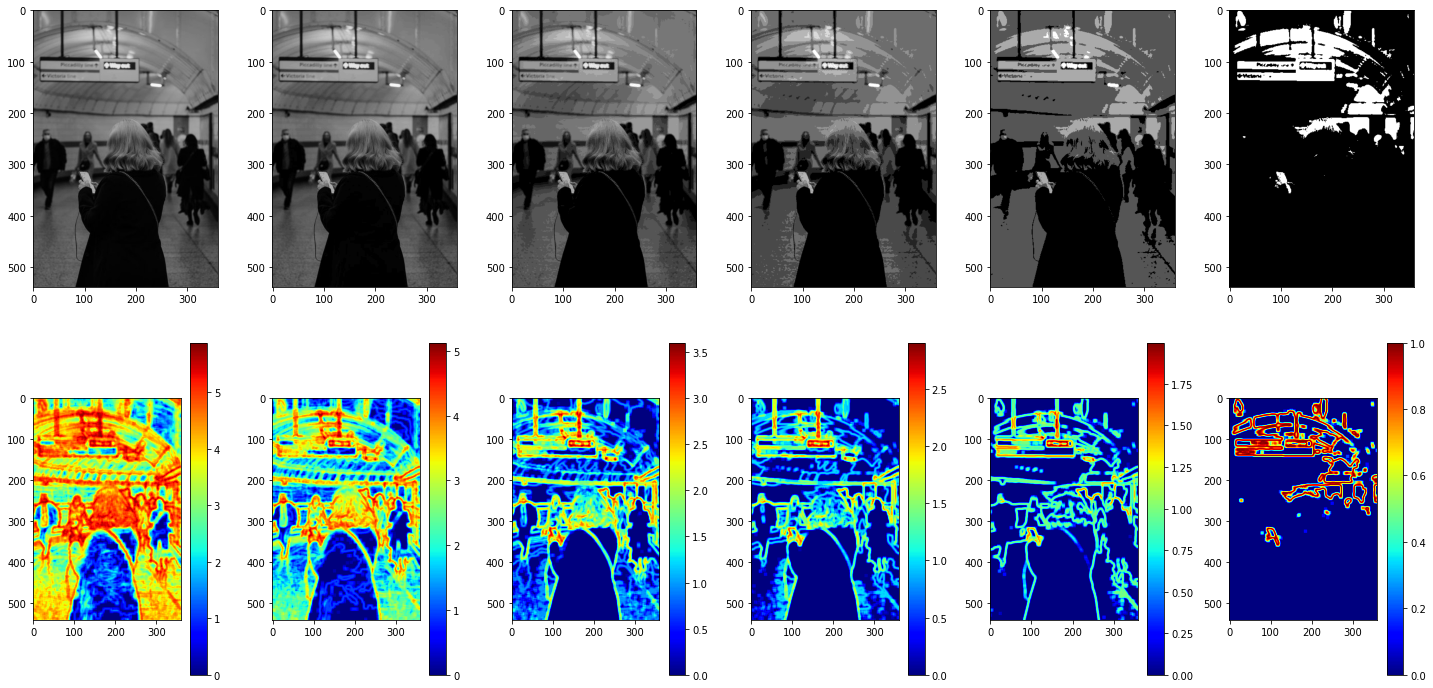

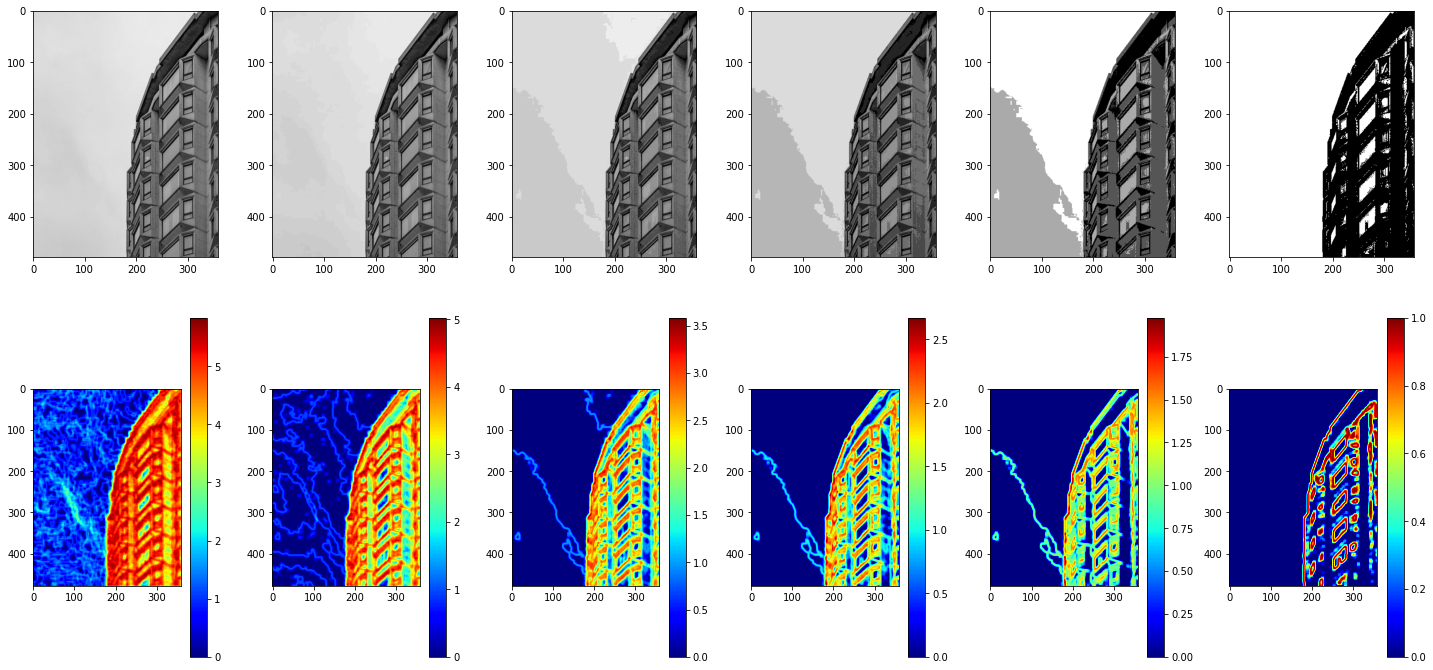

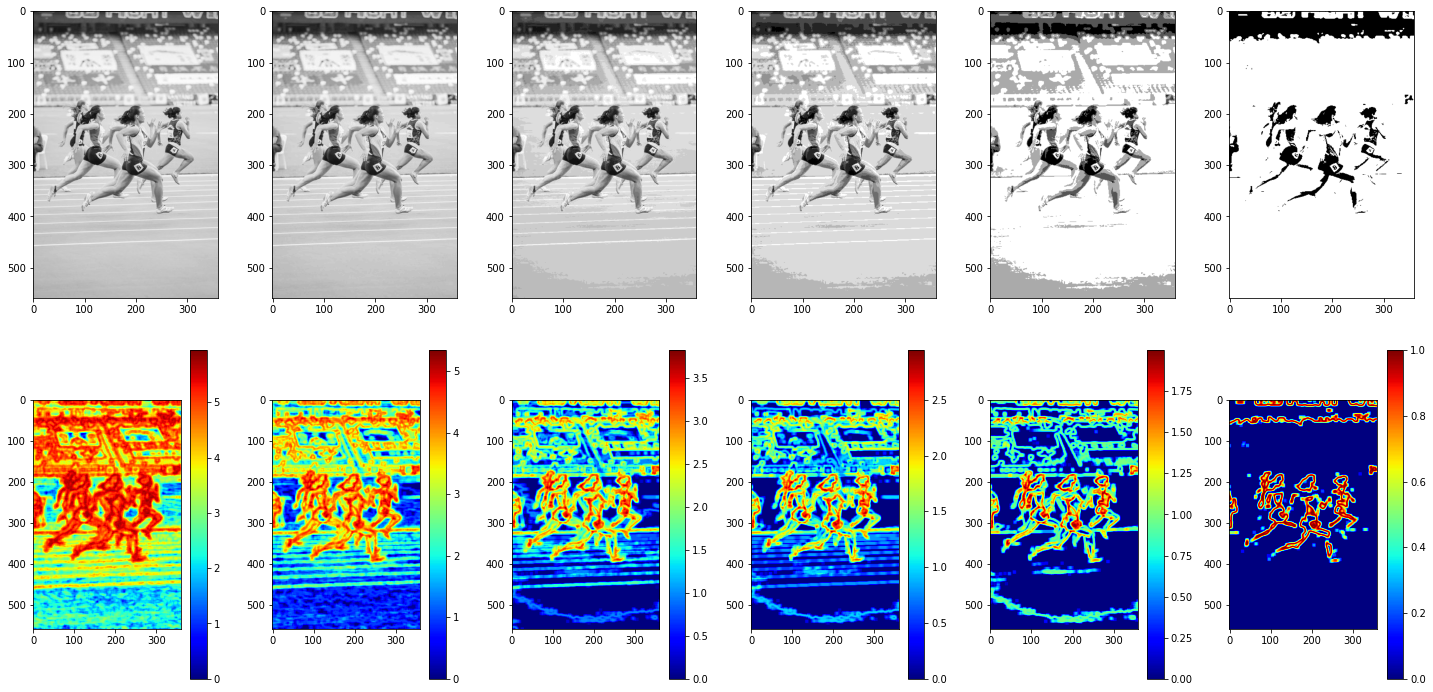

In [19]:
# Rozmiary przedziałów
spans = [1, 4, 16, 32, 64, 128]

cols = len(spans)
rows = 2

for i, im in enumerate(images):
    # Konwersja do skali szarości
    im_grey = np.array(ImageOps.grayscale(im))
    plt.figure(figsize=(20, 10))
    
    for j, span in enumerate(spans):
        # Redukcja liczby wartości
        im_grey_re = im_grey // span
        
        # Obliczanie entropii
        ent = img_entropy(im_grey_re, KERNEL_SIZE)
        
        plt.subplot(rows,cols, j + 1)
        plt.imshow(im_grey_re, cmap=plt.cm.gray)
        
        plt.subplot(rows,cols, j+1+len(spans))
        plt.imshow(ent, cmap=plt.cm.jet)
        plt.colorbar()
        
    plt.tight_layout() 
    plt.show()